In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/kaggle/input/finaldata2/final_data.csv')


In [3]:
data.head(5)


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger;
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,NaN,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0;
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0;
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0;
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0;
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0;


In [4]:
data.isnull().sum()


player                  0
team                    0
name                    0
position                0
height                 51
age                    11
appearance              0
goals                   0
assists                 0
yellow cards            0
second yellow cards     0
red cards               0
goals conceded          0
clean sheets            0
minutes played          0
days_injured            0
games_injured           0
award                   0
current_value           0
highest_value           0
position_encoded        0
winger;                 0
dtype: int64

In [5]:

data['height'] = pd.to_numeric(data['height'], errors='coerce')

mean_value = data['height'].mean()

print(mean_value)

data.fillna({'height': mean_value}, inplace=True)

181.24028357171028


In [6]:
mean_value2 = data['age'].mean()

print(mean_value2)

data.fillna({'age': mean_value}, inplace=True)

26.041853164860843


In [7]:
data.head()


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger;
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,181.240284,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0;
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0;
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0;
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0;
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0;


In [8]:
data['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [9]:
y = data['current_value']
x = data.drop('current_value', axis=1)
x['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [10]:
players = data[['name', 'team', 'current_value']]
expensive_players = players.sort_values(by='current_value', ascending=False)

top_10_expensive = expensive_players.head(10)
print(top_10_expensive)


                   name                 team  current_value
2644      Kylian Mbappé  Paris Saint-Germain      180000000
453      Erling Haaland      Manchester City      170000000
1521    Vinicius Junior          Real Madrid      150000000
960     Jude Bellingham    Borussia Dortmund      120000000
450          Phil Foden      Manchester City      110000000
1017      Jamal Musiala        Bayern Munich      110000000
474         Bukayo Saka           Arsenal FC      110000000
1516  Federico Valverde          Real Madrid      100000000
1523            Rodrygo          Real Madrid      100000000
2023     Victor Osimhen           SSC Napoli      100000000


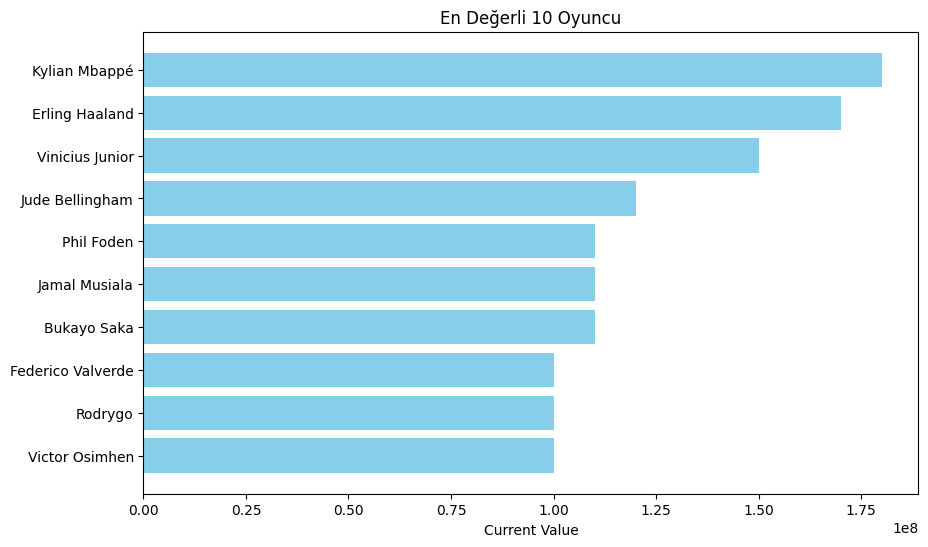

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_expensive['name'], top_10_expensive['current_value'], color='skyblue')
plt.xlabel('Current Value')
plt.title('En Değerli 10 Oyuncu')
plt.gca().invert_yaxis()
plt.show()


In [12]:

goalkeepers = data[data['position'] == 'Goalkeeper']
best_goalkeepers = goalkeepers.sort_values(by='clean sheets', ascending=True)
best_goalkeepers


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger;
5284,/frank-fielding/profil/spieler/57070,Stoke City,Frank Fielding,Goalkeeper,185.000000,35.0,2,0.0,0.0,0.0,...,1.000000,0.000000,180,400,51,2,200000,1000000,1,0;
8893,/masaaki-higashiguchi/profil/spieler/113712,Gamba Osaka,Masaaki Higashiguchi,Goalkeeper,184.000000,37.0,7,0.0,0.0,0.0,...,1.714286,0.000000,630,678,92,5,200000,1450000,1,0;
8894,/kei-ishikawa/profil/spieler/164251,Gamba Osaka,Kei Ishikawa,Goalkeeper,185.000000,30.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,0,100000,100000,1,0;
8962,/abdullah-al-saleh/profil/spieler/260850,Ettifaq FC,Abdullah Al-Saleh,Goalkeeper,185.000000,35.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,0,50000,250000,1,0;
7869,/augusto-alcorcel/profil/spieler/1021426,Club Atlético Platense,Augusto Alcorcel,Goalkeeper,181.240353,22.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,0,25000,25000,1,0;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,/davide-marfella/profil/spieler/417414,SSC Napoli,Davide Marfella,Goalkeeper,192.000000,23.0,1,0.0,0.0,0.0,...,0.000000,9.000000,10,6,1,1,50000,100000,1,0;
2622,/alexandre-letellier/profil/spieler/93730,Paris Saint-Germain,Alexandre Letellier,Goalkeeper,193.000000,32.0,2,0.0,0.0,0.0,...,0.000000,10.588235,17,307,53,5,400000,1500000,1,0;
1459,/diego-conde/profil/spieler/341713,Getafe CF,Diego Conde,Goalkeeper,188.000000,24.0,1,0.0,0.0,0.0,...,0.000000,18.000000,5,0,0,0,300000,400000,1,0;
7897,/emanuel-sittaro/profil/spieler/717685,Instituto AC Córdoba,Emanuel Sittaro,Goalkeeper,185.000000,23.0,1,0.0,0.0,0.0,...,0.000000,18.000000,5,0,0,0,25000,25000,1,0;


In [13]:
df_temp = data[['name','highest_value', 'current_value']].copy()
df_temp['hv>cv'] = df_temp['highest_value'] > df_temp['current_value']
df_temp[df_temp['hv>cv']==True]

,name,highest_value,current_value,hv>cv
0,David de Gea,70000000,15000000,True
1,Jack Butland,22000000,1500000,True
2,Tom Heaton,6000000,600000,True
4,Raphaël Varane,80000000,40000000,True
5,Harry Maguire,70000000,25000000,True
...,...,...,...,...
10742,Milos Ninkovic,5500000,250000,True
10744,Alessandro Lopane,150000,125000,True
10745,Brandon Borrello,1200000,700000,True
10746,Amor Layouni,1000000,500000,True


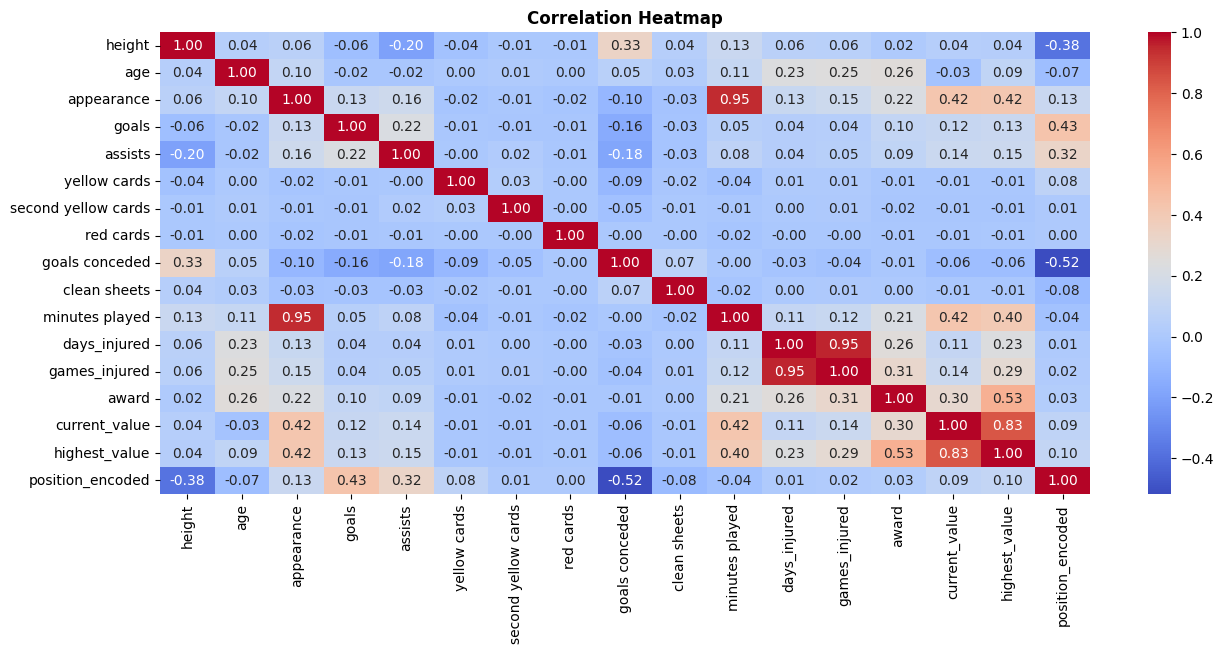

In [14]:
data.select_dtypes([int,float]).corr()['current_value'].sort_values(ascending=False)

plt.figure(figsize=(15,6))
sns.heatmap(data.select_dtypes([int,float]).corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap',fontweight='bold')
plt.show()

In [15]:
X = data.drop(['current_value'], axis='columns').values
y = data['current_value'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, X_test.shape


((8603, 21), (2151, 21))

In [16]:

df1 = data.drop(['player','name','winger;'], axis='columns')

df1.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,Manchester United,Goalkeeper,181.240284,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
2,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1
3,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2
4,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2


In [17]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award                10754 non-null 

In [18]:
from sklearn.preprocessing import LabelEncoder 

encoders = {}
text_features = ['team', 'position']
for feature in text_features: 
    encoders[feature] = LabelEncoder()
    df1[feature+"_encoded"] = encoders[feature].fit_transform(df1[feature])

<Axes: >

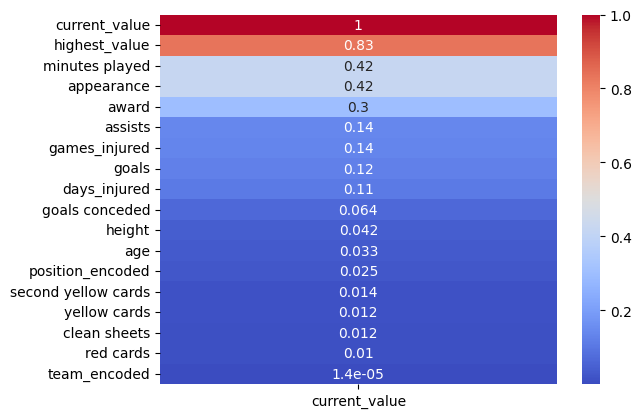

In [19]:
data_cleaned = df1.drop(columns=['team', 'position'], axis=1)
corr = data_cleaned.corr()['current_value'].abs().sort_values(ascending=False)

sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm' )

In [20]:
threshold = .005
corr = data_cleaned.corr()['current_value']
features_less_than_threshold = corr[abs(corr)<threshold].index
print(f"Şu Özellikler Kaldırılıyor: {features_less_than_threshold}")
data_cleaned.drop(columns=features_less_than_threshold, inplace=True)

Şu Özellikler Kaldırılıyor: Index(['team_encoded'], dtype='object')


In [21]:
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_cleaned.drop('current_value', axis=1), data_cleaned['current_value'], test_size= .2)

#bir dizi veri işleme veya modelleme adımını birleştirmek için kullanılır. 

from sklearn.pipeline import Pipeline 

#veri setindeki farklı özellikler arasındaki ölçek farklılıklarını giderir.

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("regressor", RandomForestRegressor(n_estimators=150))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_squared_score = r2_score(y_test, y_pred)
print(f"RandomForestRegressor ile r kare puanı: {r2_squared_score}")

RandomForestRegressor ile r kare puanı: 0.8847273313195613


In [22]:
model = DecisionTreeRegressor(max_depth=5, random_state=42, splitter='best')
model.fit(X_train, y_train)
#r2 skoru
model.score(X_test, y_test)

0.8500935055330501

# Genelleme Yeteneğini Değerlendirme****

In [23]:
#çapraz doğrulama kullanarak bir dizi modelin negatif ortalama mutlak hata skorlarını hesaplar.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('LinearRegression', Pipeline([('LR',LinearRegression())])))
pipelines.append(('DecisionTreeRegressor', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('RandomForestRegressor', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('GradientBoostingRegressor', Pipeline([('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=9, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: -2105295.027959 (123662.250208)
DecisionTreeRegressor: -1256443.096859 (74874.469877)
RandomForestRegressor: -934186.869727 (59223.502444)
GradientBoostingRegressor: -1034280.310244 (70218.092324)


In [24]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
encoders = {}
text_features = ['team', 'position']
for feature in text_features: 
    encoders[feature] = le
    data[feature+"_encoded"] = encoders[feature].fit_transform(data[feature])

In [25]:
#Selecting features
features = ['highest_value', 'appearance', 'minutes played', 'award', 'assists',
            'goals','position_encoded', 'team_encoded']

In [26]:
#Choosing target
X = data[features]
y = data['current_value']

In [27]:
#Splitting into test and train 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [28]:
#Implementing standard scaler
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#Gradient Boosting Regressor model
from sklearn import ensemble

params = {'n_estimators':500, 'max_depth':4, 'min_samples_split':2,'learning_rate': 0.01, 'loss':'squared_error'}
regressor = ensemble.GradientBoostingRegressor(**params)

regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
#Final output of model by r square score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.7840589771051171


In [32]:
from scipy.stats import kruskal


# Pozisyonlara göre gol sayılarını gruplayın
striker_goals = data[data['position'] == 'Striker']['goals']
midfielder_goals = data[data['position'] == 'Midfielder']['goals']
defender_goals = data[data['position'] == 'Defender']['goals']
goalkeeper_goals = data[data['position'] == 'Goalkeeper']['goals']

# Kruskal-Wallis testini uygulayın
h_statistic, p_value = kruskal(striker_goals,midfielder_goals,defender_goals,goalkeeper_goals)

# Sonuçları yazdırın
print("H-İstatistiği:", h_statistic)
print("P-Değeri:", p_value)

# Alfa düzeyini belirleyin
alpha = 0.05

# P değeri ile alfa düzeyini karşılaştırın
if p_value < alpha:
    print("Hipotez reddedildi: Pozisyonlar arasında gol atma sayısı üzerinde anlamlı bir fark vardır.")
else:
    print("Hipotez kabul edildi: Pozisyonlar arasında gol atma sayısı üzerinde anlamlı bir fark yoktur.")


H-İstatistiği: nan
P-Değeri: nan
Hipotez kabul edildi: Pozisyonlar arasında gol atma sayısı üzerinde anlamlı bir fark yoktur.


In [33]:
from scipy.stats import f_oneway

# Yaş gruplarına göre transfer ücretlerini gruplayın
age_groups = data['age'].unique()
age_group_transfer_fees = []

for age in age_groups:
    age_group_transfer_fees.append(data[data['age'] == age]['current_value'])

# ANOVA testi yapın
f_statistic, p_value = f_oneway(*age_group_transfer_fees)

# Sonuçları yazdırın
print("F-İstatistiği:", f_statistic)
print("P-Değeri:", p_value)

# Alfa düzeyini belirleyin
alpha = 0.05

# P değeri ile alfa düzeyini karşılaştırın
if p_value < alpha:
    print("Hipotez reddedildi: Yaş grupları arasında transfer ücreti üzerinde anlamlı bir fark vardır.")
else:
    print("Hipotez kabul edildi: Yaş grupları arasında transfer ücreti üzerinde anlamlı bir fark yoktur.")


F-İstatistiği: 8.372581784425819
P-Değeri: 2.8181988764782643e-36
Hipotez reddedildi: Yaş grupları arasında transfer ücreti üzerinde anlamlı bir fark vardır.


In [34]:
from scipy.stats import f_oneway

# Kulüplere göre transfer ücretlerini gruplayın
club_transfer_fees = []

# Örnek olarak, belirli birkaç kulübü seçebiliriz
clubs = ['Real Madrid', 'Gaziantep FK', 'Galatasaray']

for club in clubs:
    club_transfer_fees.append(data[data['team'] == club]['current_value'])

# ANOVA testi yapın
f_statistic, p_value = f_oneway(*club_transfer_fees)

# Sonuçları yazdırın
print("F-İstatistiği:", f_statistic)
print("P-Değeri:", p_value)

# Alfa düzeyini belirleyin
alpha = 0.05

# P değeri ile alfa düzeyini karşılaştırın
if p_value < alpha:
    print("Hipotez reddedildi: Kulüpler arasında transfer ücreti üzerinde anlamlı bir fark vardır.")
else:
    print("Hipotez kabul edildi: Kulüpler arasında transfer ücreti üzerinde anlamlı bir fark yoktur.")


F-İstatistiği: 9.982111849615853
P-Değeri: 0.00019597913828614
Hipotez reddedildi: Kulüpler arasında transfer ücreti üzerinde anlamlı bir fark vardır.
